<h1> Step 1: Understand the Problem and Context </h1>
Objective: Help Nairobi County prioritize investments to improve equitable access to quality education in primary schools, aligning with SDG 4.
Focus Areas:
Infrastructure and resource gaps in primary schools.
Geographic and demographic disparities in access to quality education.
<h2> Step 2: Analyze the Data </h2>
Education Facilities Data:
Assess infrastructure indicators such as school capacity, classroom sizes, teacher-student ratios, and geo-locations.
Identify schools with limited infrastructure or overcrowding issues.
Kenya Population and Housing Census:
Analyze demographic data to identify areas with higher populations of school-age children.
Investigate socioeconomic disparities and their potential impact on access to education.
<h2> Step 3: Hypotheses Development </h2>
Initial Hypotheses:
Schools in densely populated areas may have insufficient infrastructure.
Socioeconomically disadvantaged areas have fewer well-resourced schools.
Geographic distribution of schools might not align with population density.
<h2> Step 4: Perform the Analysis </h2>
Use Python for data cleaning, exploration, and visualization. Libraries such as Pandas, Matplotlib, Seaborn, and GeoPandas can be particularly useful.
Analyze:
Accessibility: Map schools relative to population density.
Infrastructure Gaps: Highlight discrepancies in facilities like classroom numbers, electricity, or sanitation.
Equity: Examine disparities in education access based on socioeconomic or geographic factors.
<h2> Step 5: Prepare Insights and Recommendations </h2>
Slide Structure:

Cover Slide: Project title, date, and your details.
Introduction: Problem statement, objectives, and key questions.
Data Summary: Overview of datasets, key metrics, and assumptions.
Analysis Results:
Visualize geographic and demographic disparities.
Highlight critical gaps in school infrastructure and resources.
Recommendations:
Prioritized list of actions based on the analysis (e.g., investment in specific schools/areas).
Practical steps for implementation (aligned with SDGs).
Conclusion:
Summarize key findings and emphasize actionable points.
<h2> Step 6: Document Code</h2>
Ensure the code is modular, well-documented, and clean.
Include comments explaining data cleaning steps, assumptions, and calculations.
Prepare a README file summarizing how the code works and what it achieves.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kenya_primary_schools.csv')

In [3]:
df.head()

,X,Y,FID,Name_of_Sc,Level_,Status,SchSponsor,Type1,Type2,Type3,...,OthersF,NoTeaching,NonTeachin,Province,District,Division,Location,Costituenc,Latitude,Longitude
0,36.14,0.27,10001,CHEBIREBEI PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,0.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.27,36.14
1,36.17,0.26,10002,WASEGES PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,SINENDE,0.26,36.17
2,36.18,0.24,10003,KIRIBOT PRI,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.24,36.18
3,36.19,0.21,10004,KABUSWO PRI SCH,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,2.0,0.0,RIFT VALLEY,KOIBATEK,KISANANA,MOGOTIO,KABUSWO,0.21,36.19
4,37.70,-0.88,10005,VONDENI PRI SCHOOL,PRIMARY SCHOOL,PUBLIC,COMMUNITY,MIXED,DAY ONLY,ORDINARY,...,0.0,1.0,1.0,EASTERN,MACHAKOS,MASINGA,KIVAA,MASINGA,-0.88,37.70


In [4]:
df.shape

(31230, 38)

In [5]:
df.columns

Index(['X', 'Y', 'FID', 'Name_of_Sc', 'Level_', 'Status', 'SchSponsor',
       'Type1', 'Type2', 'Type3', 'PupilTeach', 'ClassrmRat', 'ToiletRati',
       'No_Classrm', 'BoysToilet', 'GirlsToilet', 'TeachersTo', 'TotalToile',
       'TotalBoys', 'TotalGirls', 'TotalEnrol', 'GO_KTSC_M', 'GOK_TSC_F',
       'authorityM', 'authorityF', 'PTA_BOG_M', 'PTA_BOG_F', 'OthersM',
       'OthersF', 'NoTeaching', 'NonTeachin', 'Province', 'District',
       'Division', 'Location', 'Costituenc', 'Latitude', 'Longitude'],
      dtype='object')

<h2> Potential Analysis and Recommendations </h2>

1. Infrastructure Gap Analysis: 
- Identify schools with inadequate infrastructure such as lack of classrooms, sanitation facilities.
- Prioritize investements. Recommend allocating resources to upgrade or build new facilities in these areas.
- Visualize: Create maps/charts to highlight the geographic distributionof schools with infrastructure needs.

2. Student-Teacher Ratio Analysis:
- Calculate student-teacher ratios. Identify areas where the ratio is significantly higher to improve the quality of education.Recommend teacher recruitment.

3. Accessiblity Analysis:
- Identify schools with poor accessiblity. Analyze the geolocation data to identify schools that are far from residential areas or have poor raod connectivity. Recommend transportation solutions. Suggest initiatives like school bus services or infrastructure improvements to enhance accessibility.

4. Demographic Analysis:
- Identify areas with high population growth. Analyze the Population Census Data to identify areas with high population growth rates.
- Anticipate future needs. recommend proactive measures to accommodate future increases in school enrollment.

5. Equity Analysis:
- Identify disparities in education access. Analyze the data to identify any disparities in access to education based on factors like gender, socioeconomic status or geographic location.
- Recommendtargeted interventions. Suggest initiatives to address these disparities such as scholarships, mentorship programs, or specialized educational programs.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31230 entries, 0 to 31229
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X            31230 non-null  float64
 1   Y            31230 non-null  float64
 2   FID          31230 non-null  int64  
 3   Name_of_Sc   31229 non-null  object 
 4   Level_       31229 non-null  object 
 5   Status       31229 non-null  object 
 6   SchSponsor   31229 non-null  object 
 7   Type1        31229 non-null  object 
 8   Type2        31229 non-null  object 
 9   Type3        31229 non-null  object 
 10  PupilTeach   31229 non-null  float64
 11  ClassrmRat   31229 non-null  float64
 12  ToiletRati   31229 non-null  float64
 13  No_Classrm   31229 non-null  float64
 14  BoysToilet   31229 non-null  float64
 15  GirlsToilet  31229 non-null  float64
 16  TeachersTo   31229 non-null  float64
 17  TotalToile   31229 non-null  float64
 18  TotalBoys    31229 non-null  float64
 19  Tota

In [7]:
# Data Cleaning
df.columns = df.columns.str.strip().str.lower()  # Normalize column names
df.rename(columns={
    'name_of_sc': 'school_name',
    'no_classrm': 'classrooms',
    'boystoilet': 'boys_toilet',
    'girlstoilet': 'girls_toilet',
    'teachers_to': 'teachers',
    'totaltoile': 'total_toilets',
    'totalboys': 'total_boys',
    'totalgirls': 'total_girls',
    'totalenrol': 'total_enrollment',
    'classrmrat': 'classroom_ratio',
    'toiletrati': 'toilet_ratio'
}, inplace=True)

<Axes: xlabel='Sub-county', ylabel='Count'>

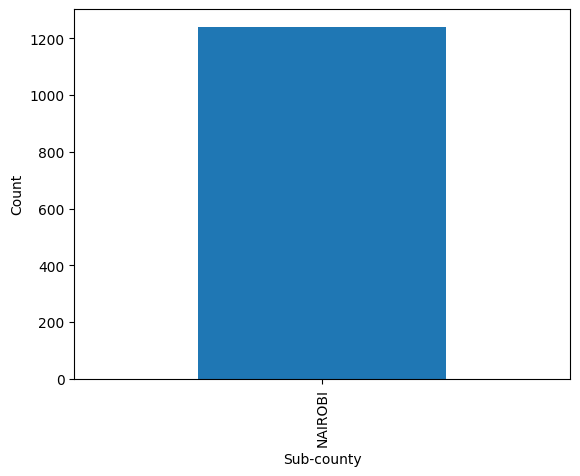

In [34]:
df['province'].value_counts().plot(kind='bar', xlabel='Sub-county', ylabel='Count')

In [8]:
df = df[df['province']== 'NAIROBI']

In [28]:
df.head()

,x,y,fid,school_name,level_,status,schsponsor,type1,type2,type3,...,province,district,division,location,costituenc,latitude,longitude,student_teacher_ratio,classroom_student_ratio,toilet_student_ratio
587,36.85,-1.26,10588,BRIGHT ACADEMY PR,PRIMARY SCHOOL,PRIVATE,NGO/CBO,MIXED,DAY ONLY,ORDINARY,...,NAIROBI,NAIROBI,STAREHE,MATHARE,STAREHE,-1.26,36.85,20.000000,20.000000,inf
13645,36.91,-1.27,8646,DIWOPA PRI SCH,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,,,ORDINARY,...,NAIROBI,NAIROBI,EMBAKASI,KAYOLE,EMBAKASI,-1.27,36.91,NaN,NaN,NaN
20270,36.75,-1.28,21271,GATINA PRI SCH,PRIMARY SCHOOL,PUBLIC,LOCAL GOVERNMENT AUTHORITY,MIXED,DAY ONLY,ORDINARY,...,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.28,36.75,142.333333,50.235294,inf
20276,36.76,-1.27,21277,MUGWAM EDUC CENTRE PRI SCHOOL,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,...,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.27,36.76,24.000000,4.800000,inf
20282,36.76,-1.27,21283,MUGWAM EDUCATION CENTRE (PRI) SCH,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,...,NAIROBI,NAIROBI,DAGORETTI,KAWANGWARE,DAGORETTI,-1.27,36.76,24.000000,4.800000,inf


In [29]:
df.columns

Index(['x', 'y', 'fid', 'school_name', 'level_', 'status', 'schsponsor',
       'type1', 'type2', 'type3', 'pupilteach', 'classroom_ratio',
       'toilet_ratio', 'classrooms', 'boys_toilet', 'girls_toilet',
       'teachersto', 'total_toilets', 'total_boys', 'total_girls',
       'total_enrollment', 'go_ktsc_m', 'gok_tsc_f', 'authoritym',
       'authorityf', 'pta_bog_m', 'pta_bog_f', 'othersm', 'othersf',
       'noteaching', 'nonteachin', 'province', 'district', 'division',
       'location', 'costituenc', 'latitude', 'longitude',
       'student_teacher_ratio', 'classroom_student_ratio',
       'toilet_student_ratio'],
      dtype='object')

In [30]:
df.describe()

,x,y,fid,pupilteach,classroom_ratio,toilet_ratio,classrooms,boys_toilet,girls_toilet,teachersto,...,pta_bog_f,othersm,othersf,noteaching,nonteachin,latitude,longitude,student_teacher_ratio,classroom_student_ratio,toilet_student_ratio
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,...,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1051.00,1052.000000,1030.0
mean,36.847647,-1.266535,22304.450443,18.025302,19.678807,27.739968,9.010475,3.697824,4.481869,1.788074,...,1.341660,1.896052,2.672844,1.937147,1.995165,-1.266535,36.847647,inf,inf,inf
std,0.066895,0.033501,653.722584,22.089667,19.008106,34.813212,8.413740,4.648767,5.979389,2.154003,...,2.779408,3.750225,5.021821,3.660722,2.957218,0.033501,0.066895,NaN,NaN,NaN
min,36.680000,-1.370000,8646.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.370000,36.680000,0.00,0.000000,inf
25%,36.790000,-1.290000,22043.000000,4.900000,5.000000,3.000000,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.290000,36.790000,50.00,10.551875,NaN
50%,36.870000,-1.270000,22353.000000,13.700000,15.700000,18.700000,8.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.270000,36.870000,117.00,19.866071,NaN
75%,36.900000,-1.250000,22663.000000,25.400000,28.500000,39.000000,12.000000,5.000000,6.000000,2.000000,...,2.000000,3.000000,4.000000,2.000000,3.000000,-1.250000,36.900000,311.25,33.223958,NaN
max,37.060000,-1.170000,22995.000000,289.000000,179.000000,440.500000,56.000000,26.000000,38.000000,26.000000,...,27.000000,51.000000,46.000000,41.000000,35.000000,-1.170000,37.060000,inf,inf,inf


<h2> Infrastructure Gap Analysis </h2>

<Axes: xlabel='classrooms'>

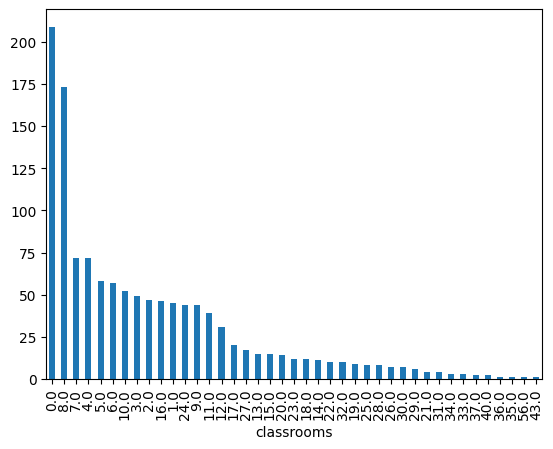

In [9]:
classrms=df['classrooms'].value_counts()
classrms.plot(kind='bar')

<h2> Geographic Analysis </h2>

In [11]:
df.columns

Index(['x', 'y', 'fid', 'school_name', 'level_', 'status', 'schsponsor',
       'type1', 'type2', 'type3', 'pupilteach', 'classroom_ratio',
       'toilet_ratio', 'classrooms', 'boys_toilet', 'girls_toilet',
       'teachersto', 'total_toilets', 'total_boys', 'total_girls',
       'total_enrollment', 'go_ktsc_m', 'gok_tsc_f', 'authoritym',
       'authorityf', 'pta_bog_m', 'pta_bog_f', 'othersm', 'othersf',
       'noteaching', 'nonteachin', 'province', 'district', 'division',
       'location', 'costituenc', 'latitude', 'longitude'],
      dtype='object')

In [27]:
df['division'].value_counts().head(10)

division
KASARANI     372
EMBAKASI     244
KIBERA       154
DAGORETTI    133
WESTLANDS    127
STAREHE      107
MAKADARA      61
PUMWANI       43
Name: count, dtype: int64

In [14]:
df['division'].value_counts().tail(10)

division
KASARANI     372
EMBAKASI     244
KIBERA       154
DAGORETTI    133
WESTLANDS    127
STAREHE      107
MAKADARA      61
PUMWANI       43
Name: count, dtype: int64

In [32]:
df['location'].value_counts().head(10)

location
RUARAKA       76
KARIOBANGI    71
KASARANI      68
KAYOLE        60
GITHURAI      51
UMOJA         49
HURUMA        47
KANGEMI       45
DANDORA       45
RIRUTA        43
Name: count, dtype: int64

In [33]:
df['location'].value_counts().tail(10)

location
SARANGOMBE    1
KIATATHI      1
FUATANYAYO    1
PUMWANI       1
OLYMPIC       1
SOUTH B       1
MIHANGO       1
UTAWALA       1
DOONHOLM      1
UTALI         1
Name: count, dtype: int64

<h2> School Characteristics </h2>

<Axes: ylabel='count'>

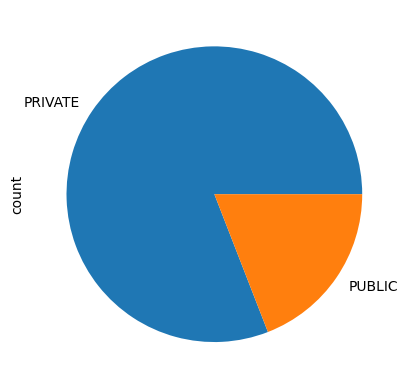

In [15]:
df['status'].value_counts().plot(kind='pie')

<Axes: xlabel='schsponsor'>

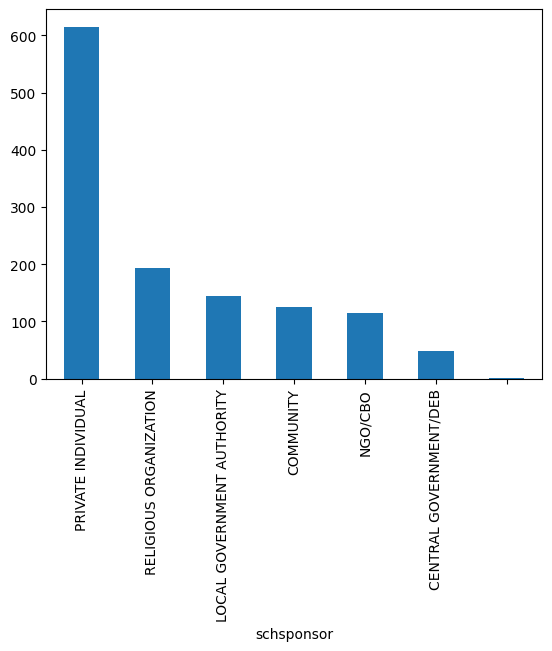

In [16]:
df['schsponsor'].value_counts().plot(kind='bar')

<Axes: xlabel='schsponsor'>

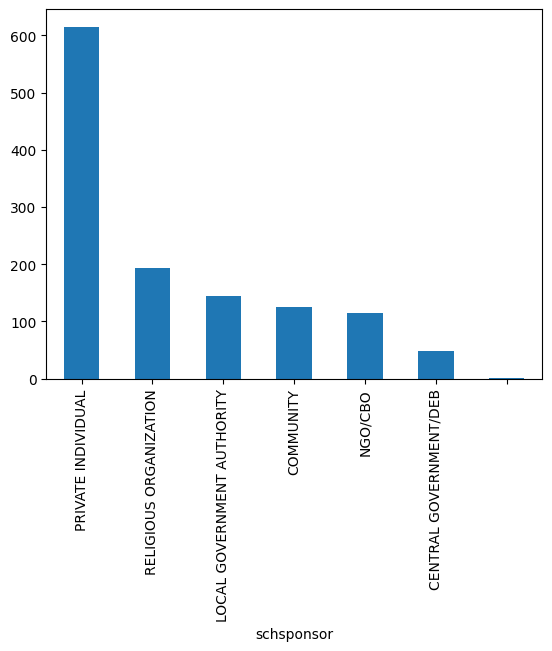

In [35]:
df['schsponsor'].value_counts().tail(10).plot(kind='bar')

<h2> Infrastructure and Resource Allocation </h2>

In [18]:
# Calculate Additional Metrics
df['student_teacher_ratio'] = df['total_enrollment'] / df['teachersto']
df['classroom_student_ratio'] = df['total_enrollment'] / df['classrooms']
df['toilet_student_ratio'] = df['total_enrollment'] / df['total_toilets']

In [31]:
# Analysis and Insights
# 1. Schools with High Student-Teacher Ratios
high_teacher_ratio = df[df['student_teacher_ratio'] > 40]
print(f"Number of schools with high student-teacher ratios: {len(high_teacher_ratio)}")

Number of schools with high student-teacher ratios: 828


In [20]:
# 2. Schools with Overcrowded Classrooms
overcrowded_classrooms = df[df['clas sroom_student_ratio'] > 40]
print(f"Number of schools with overcrowded classrooms: {len(overcrowded_classrooms)}")

Number of schools with overcrowded classrooms: 193


In [21]:
# 3. Schools with Poor Sanitation
poor_sanitation = df[df['toilet_student_ratio'] > 25]
print(f"Number of schools with poor sanitation facilities: {len(poor_sanitation)}")

Number of schools with poor sanitation facilities: 1030


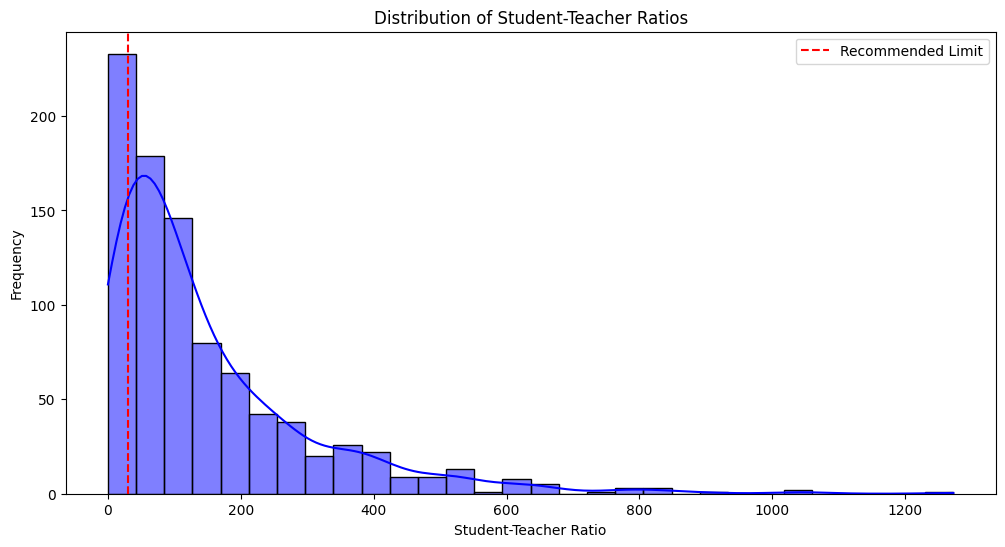

In [22]:
# Visualization: Distribution of Ratios
plt.figure(figsize=(12, 6))
sns.histplot(df['student_teacher_ratio'], kde=True, bins=30, color='blue')
plt.title('Distribution of Student-Teacher Ratios')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Frequency')
plt.axvline(30, color='red', linestyle='--', label='Recommended Limit')
plt.legend()
plt.show()

<h2> GeoSpatial Analysis </h2>

In [23]:
import geopandas as gpd

In [24]:
import folium

In [25]:
# Geospatial Mapping
# Convert to GeoDataFrame
geo_data = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

In [26]:
# Create a Map
school_map = folium.Map(location=[-1.286389, 36.817223], zoom_start=10)  # Nairobi's coordinates

# Add Markers for Schools
for _, row in high_teacher_ratio.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"School: {row['school_name']}\nRatio: {row['student_teacher_ratio']:.2f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(school_map)

school_map.save('schools_map.html')